In [1]:
!pip install pyforest


In [2]:
from pyforest import*
lazy_imports()

['from statsmodels.tsa.arima_model import ARIMA',
 'import statsmodels.api as sm',
 'from dask import dataframe as dd',
 'import keras',
 'from sklearn.linear_model import LassoCV',
 'from sklearn.linear_model import LinearRegression',
 'from sklearn.model_selection import StratifiedKFold',
 'import xgboost as xgb',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'import sys',
 'import fastai',
 'import pandas as pd',
 'import cv2',
 'from sklearn.cluster import KMeans',
 'import nltk',
 'import re',
 'from sklearn.linear_model import RidgeCV',
 'from sklearn.decomposition import PCA',
 'from sklearn.model_selection import KFold',
 'from sklearn.preprocessing import PolynomialFeatures',
 'import textblob',
 'from sklearn.model_selection import train_test_split',
 'import pickle',
 'import os',
 'import spacy',
 'import plotly.express as px',
 'from scipy import stats',
 'import lightgbm as lgb',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import t

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
train_data=pd.read_csv('/content/bigmart_train.csv')
test_data=pd.read_csv('/content/bigmart_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
test_data.head(5)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [9]:
train_data['source'] = 'train'
test_data['source'] = 'test'
df = pd.concat([train_data, test_data], ignore_index= True)
df.tail()

<IPython.core.display.Javascript object>

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


In [10]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

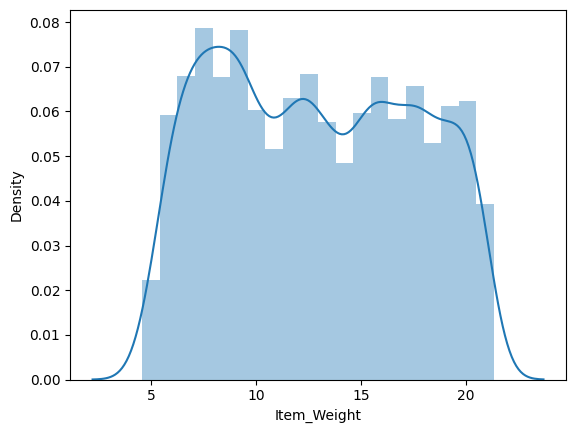

<Figure size 300x100 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

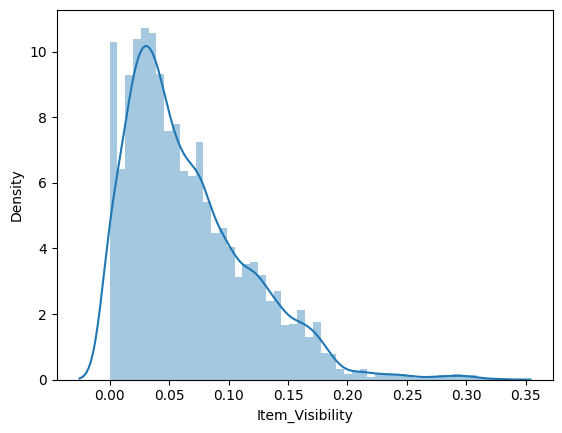

<Figure size 300x100 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

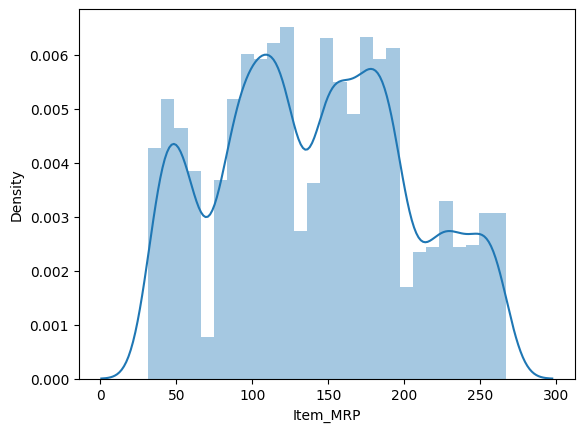

<Figure size 300x100 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

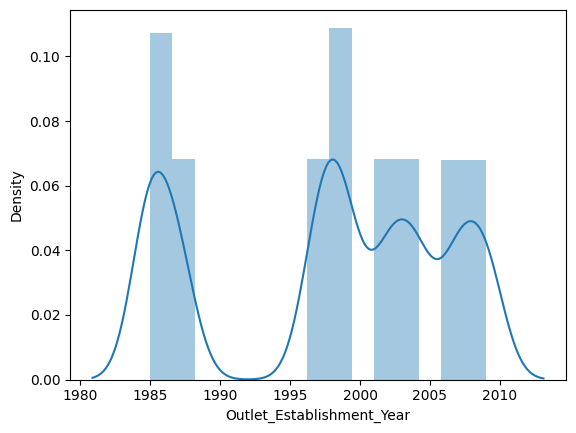

<Figure size 300x100 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

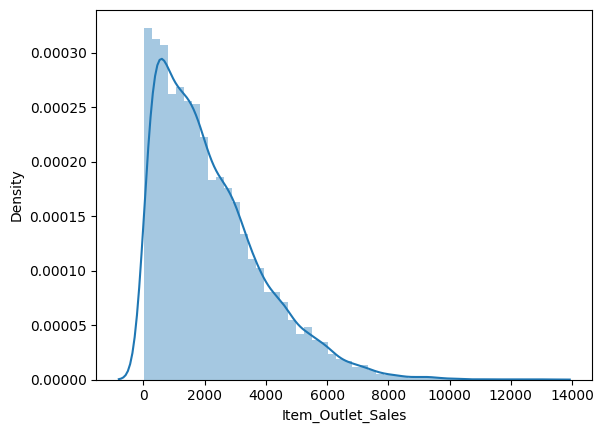

<Figure size 300x100 with 0 Axes>

In [11]:
for i in train_data.describe().columns:
    sns.distplot(train_data[i].dropna())
    plt.figure(figsize=(3, 1))
    plt.show()



<IPython.core.display.Javascript object>

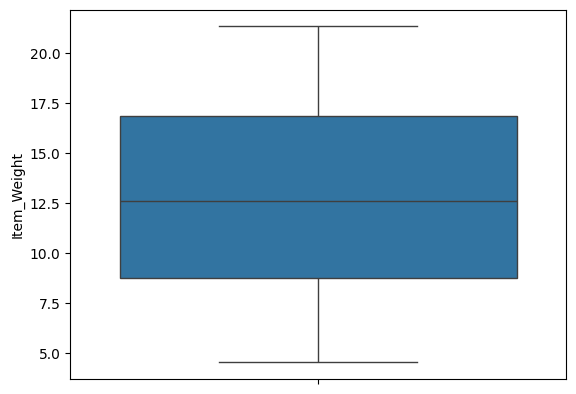

<IPython.core.display.Javascript object>

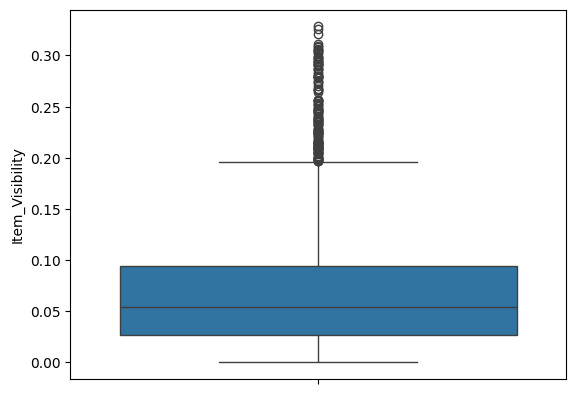

<IPython.core.display.Javascript object>

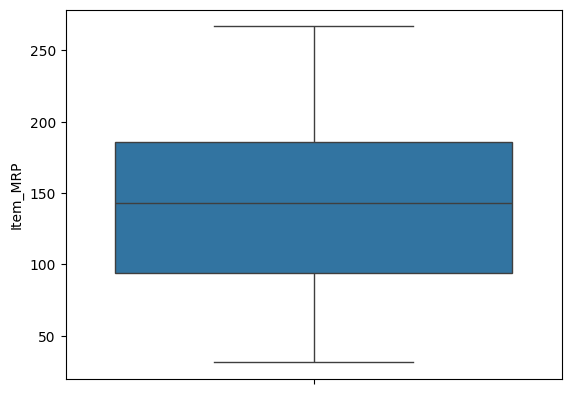

<IPython.core.display.Javascript object>

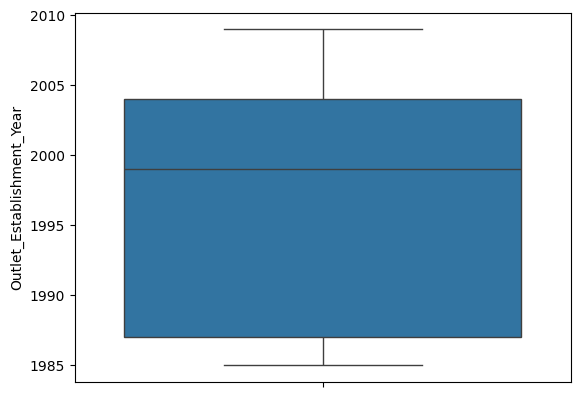

<IPython.core.display.Javascript object>

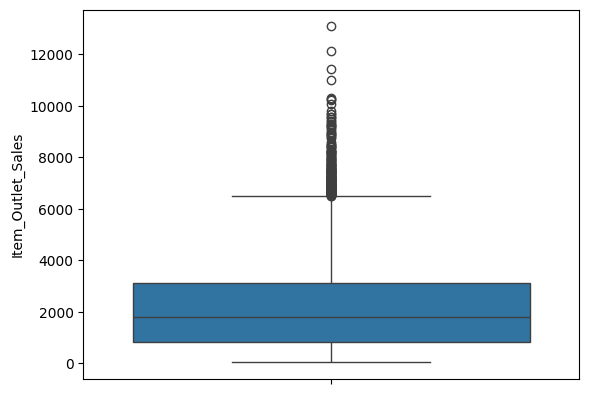

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64


In [12]:
import matplotlib.pyplot as plt

for i in train_data.describe().columns:
    sns.boxplot(train_data[i].dropna())

    plt.show()

print(train_data.isna().sum())

#dealing with missing values

#df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())
#df['Outlet_Size '] = df[Outlet_Size'].fillna(df['Outlet_Size'].median())


In [13]:
train_data.Outlet_Size.value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

<IPython.core.display.Javascript object>

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 [Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000'),
  Text(6000.0, 0, '6000')])

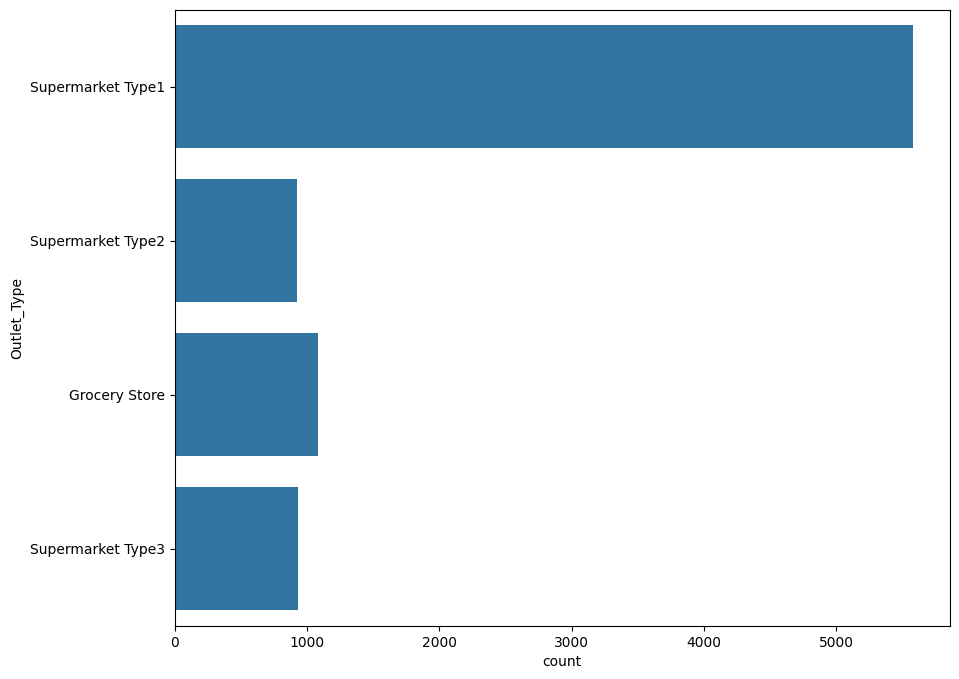

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(train_data.Outlet_Type)
plt.xticks(rotation=0)

In [15]:
train_data.Outlet_Type.value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

**Distribution of Different features
**




<IPython.core.display.Javascript object>

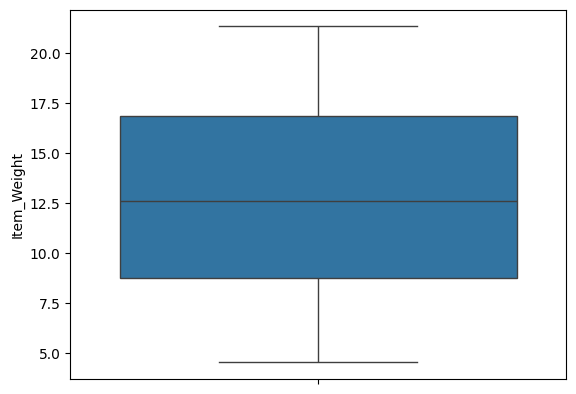

<Figure size 300x100 with 0 Axes>

<IPython.core.display.Javascript object>

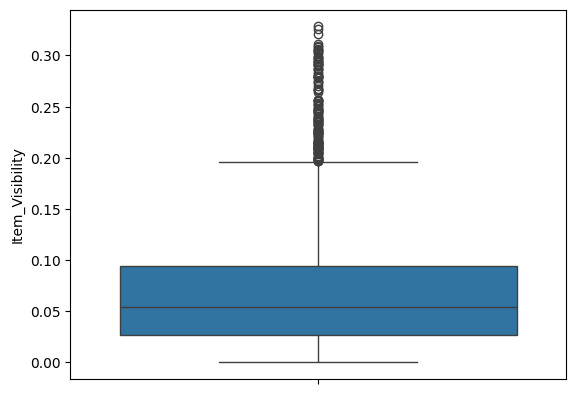

<Figure size 300x100 with 0 Axes>

<IPython.core.display.Javascript object>

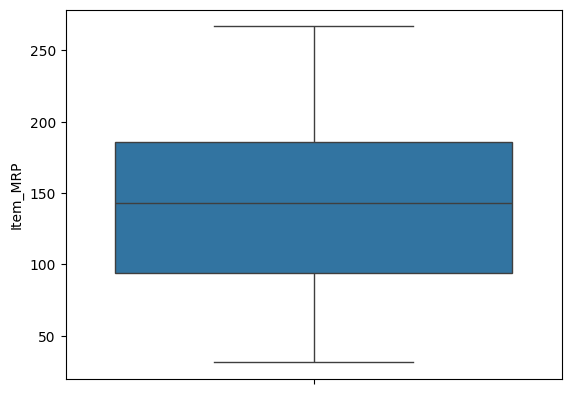

<Figure size 300x100 with 0 Axes>

<IPython.core.display.Javascript object>

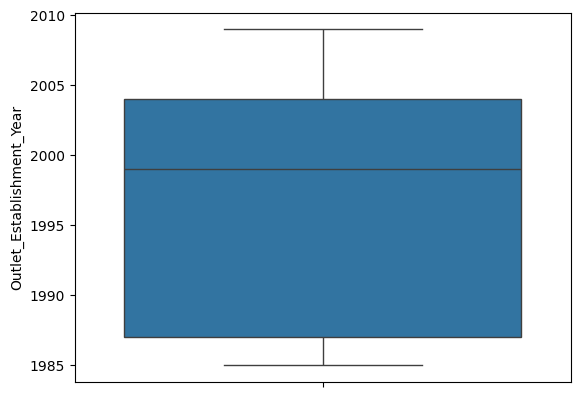

<Figure size 300x100 with 0 Axes>

<IPython.core.display.Javascript object>

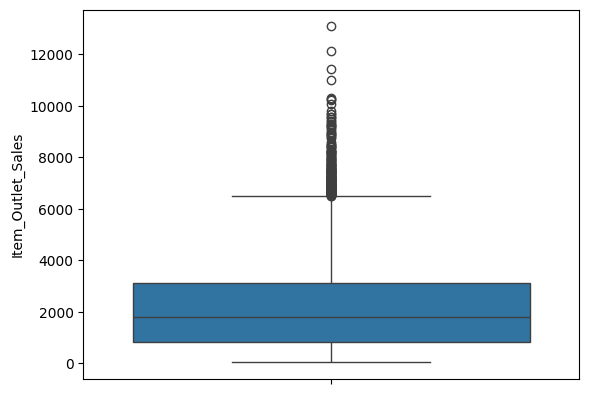

<Figure size 300x100 with 0 Axes>

In [16]:
for i in train_data.describe().columns:
    sns.boxplot(train_data[i].dropna())
    plt.figure(figsize=(3, 1))
    plt.show()



In [17]:
df.dtypes


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [18]:
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace({'Low Fat': 'low_fat','LF':'low_fat','reg':'Regular','low fat':'low_fat'})
train_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
low_fat    5517
Regular    3006
Name: count, dtype: int64

In [19]:
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace({'Low Fat': 'low_fat','LF':'low_fat','reg':'Regular','low fat':'low_fat'})

In [20]:
test_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
low_fat    3668
Regular    2013
Name: count, dtype: int64

In [21]:
train_data['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [22]:
train_data['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [23]:
train_data.Outlet_Size.value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

** **Item_Weight and Item_Outlet_Sales Analysis**

<IPython.core.display.Javascript object>

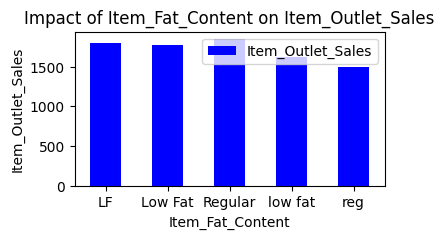

In [24]:
Item_Type_pivot = \
df.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)

Item_Type_pivot.plot(kind='bar',color='blue',figsize=(4,2))
plt.xlabel('Item_Fat_Content')
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

**Item_Weight and Item_Outlet_Sales Analysis**


<IPython.core.display.Javascript object>

<Axes: title={'center': 'Item_Weight and Item_Outlet_Sales Analysis'}, xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

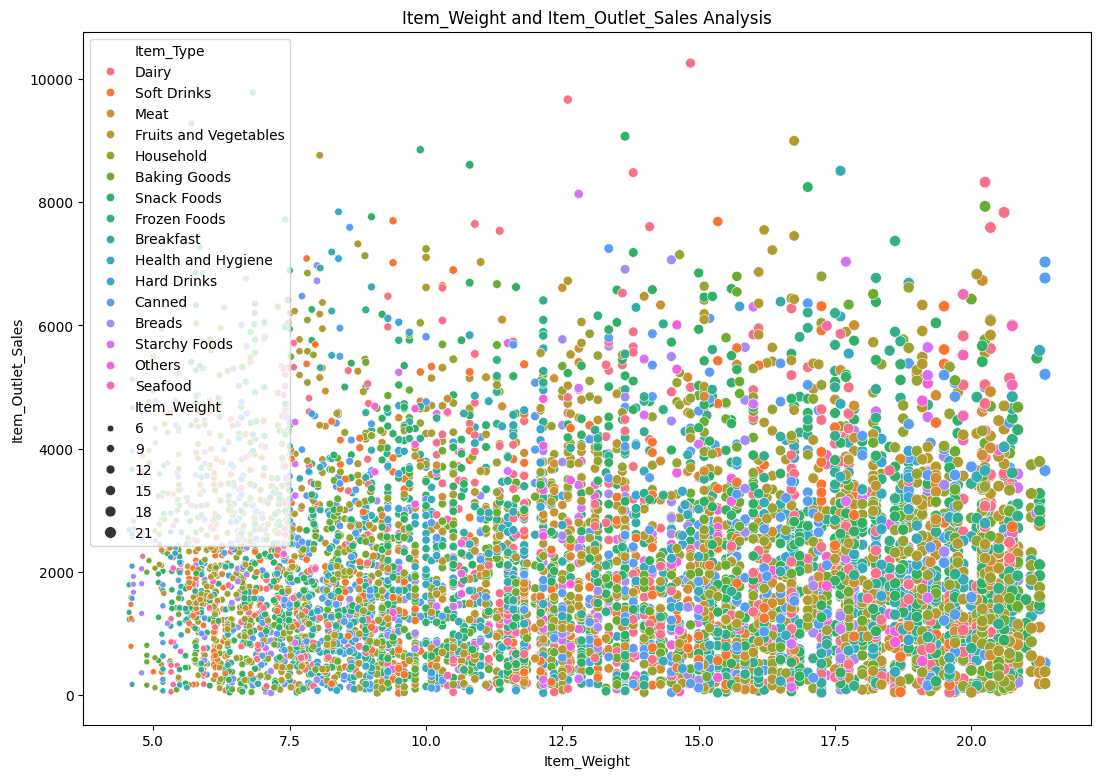

In [25]:
plt.figure(figsize=(13,9))
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Weight and Item_Outlet_Sales Analysis')
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales',hue='Item_Type', size='Item_Weight',data=df)

**Item_Visibility and Maximum Retail Price**

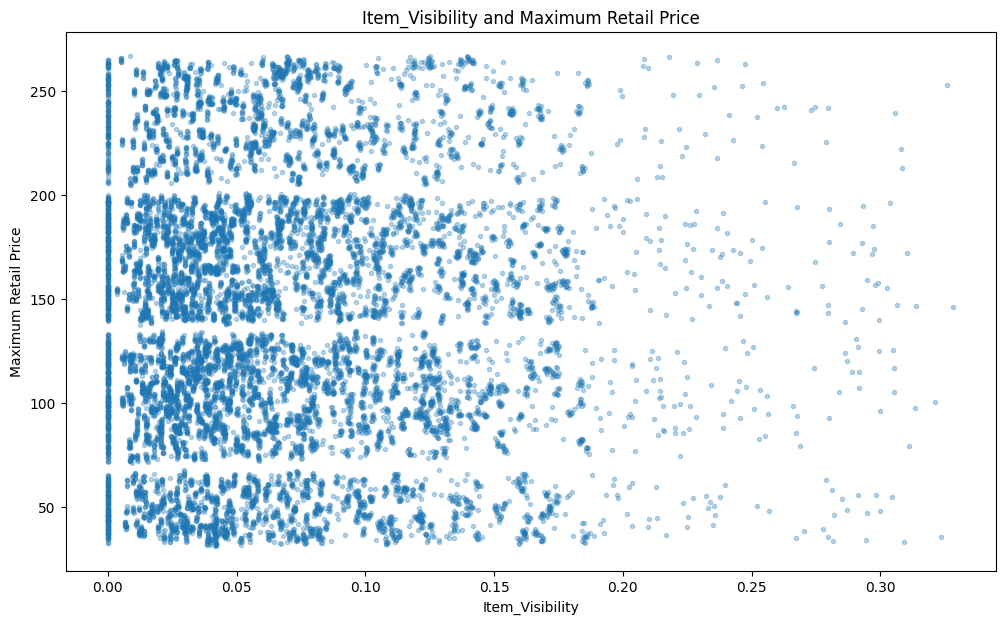

In [26]:
plt.figure(figsize=(12,7))
plt.xlabel('Item_Visibility')
plt.ylabel('Maximum Retail Price')
plt.title('Item_Visibility and Maximum Retail Price')
plt.plot(df.Item_Visibility, df.Item_MRP, ".",alpha = 0.3)

**Impact of Outlet_Type on Item_Outlet_Sales**


<IPython.core.display.Javascript object>

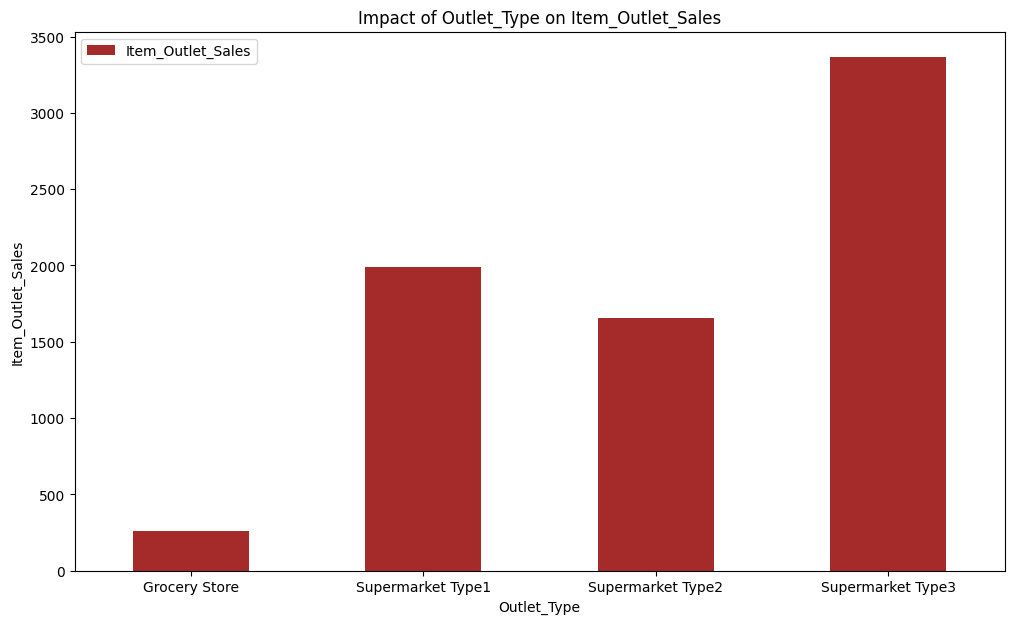

In [27]:
Item_Type_pivot = \
df.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)

Item_Type_pivot.plot(kind='bar',color='brown',figsize=(12,7))
plt.xlabel('Outlet_Type')
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [28]:
numeric_data = train_data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()


<IPython.core.display.Javascript object>

**Correlation between different attributes**

<IPython.core.display.Javascript object>

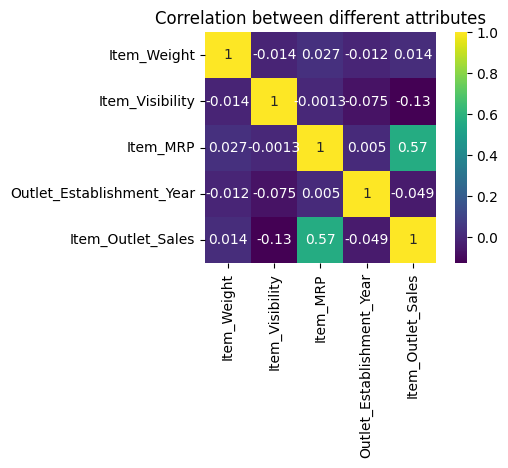

In [29]:
plt.figure(figsize=(5,3))
sns.heatmap(correlation_matrix,vmax=1, square=True,annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

In [30]:
train_data.head(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,low_fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,low_fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train


# #**Feature Engineering , Selection and Transformation**

In [31]:
train_data['Item_Weight'] = train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean())
train_data['Outlet_Size'] = train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode().iloc[0])

test_data['Item_Weight'] = test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean())
test_data['Outlet_Size'] = test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode().iloc[0])



In [32]:
train_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

In [33]:
y_train = train_data['Item_Outlet_Sales']
x_train = train_data


In [34]:
test_data.columns
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace({'Low Fat': 'low_fat','LF':'low_fat','reg':'Regular','low fat':'low_fat'})
train_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
low_fat    5517
Regular    3006
Name: count, dtype: int64

In [35]:
# prompt: split above Y_train data into test and train 80 is top 20



In [36]:
x_train = train_data.drop(columns=['Item_Outlet_Sales'])

In [37]:
y_train.head(2)

0    3735.1380
1     443.4228
Name: Item_Outlet_Sales, dtype: float64

In [38]:
x_train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,9.30,low_fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,train


In [39]:
x_test=test_data

In [40]:
x_test.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDW58,20.75,low_fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test
1,FDW14,8.30,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,test


In [41]:
x_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
source                        object
dtype: object

In [42]:
x_train=x_train.drop(columns=['Item_Identifier','source','Outlet_Identifier'])



In [43]:
x_test = x_test.drop(columns=['Item_Identifier','source','Outlet_Identifier'])

In [44]:
x_train.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [45]:
y_train.isna().sum()

0

In [46]:
cat_f =['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']

In [47]:
from catboost import CatBoostRegressor

# Initialize CatBoost Regressor with optional parameters
model = CatBoostRegressor()

# Train the model
model.fit(x_train, y_train, cat_features=cat_f)

# Predict using the trained model
predictions = model.predict(x_test)



Learning rate set to 0.05744
0:	learn: 1652.0052964	total: 63.4ms	remaining: 1m 3s
1:	learn: 1603.1721785	total: 71.5ms	remaining: 35.7s
2:	learn: 1556.6758098	total: 80.6ms	remaining: 26.8s
3:	learn: 1513.7926378	total: 90.1ms	remaining: 22.4s
4:	learn: 1475.7239467	total: 96.9ms	remaining: 19.3s
5:	learn: 1441.5275095	total: 107ms	remaining: 17.7s
6:	learn: 1408.0615453	total: 113ms	remaining: 16.1s
7:	learn: 1377.6361070	total: 122ms	remaining: 15.1s
8:	learn: 1349.0558795	total: 129ms	remaining: 14.2s
9:	learn: 1323.8905444	total: 137ms	remaining: 13.6s
10:	learn: 1302.0361692	total: 145ms	remaining: 13.1s
11:	learn: 1282.5959788	total: 153ms	remaining: 12.6s
12:	learn: 1263.0631477	total: 160ms	remaining: 12.1s
13:	learn: 1246.2313516	total: 168ms	remaining: 11.8s
14:	learn: 1229.4600196	total: 175ms	remaining: 11.5s
15:	learn: 1213.8643815	total: 182ms	remaining: 11.2s
16:	learn: 1201.2742835	total: 189ms	remaining: 10.9s
17:	learn: 1188.7194968	total: 197ms	remaining: 10.8s
18:	

In [48]:
model_accuracy_train_cat= model.score(x_train,y_train)*100
model_accuracy_train_cat

67.62163587575914

In [49]:
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 200, 300]
}


In [50]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator= model, param_grid = param_grid, cv = 5)

In [51]:
y_train.isnull().sum()

0

In [52]:
y_train.shape

(8523,)

In [55]:
'''gs.fit(x_train, y_train) #try on later

# Get the best parameters and the best score
best_params = gs.best_params_
best_score = gs.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)'''

'gs.fit(x_train, y_train)\n\n# Get the best parameters and the best score\nbest_params = gs.best_params_\nbest_score = gs.best_score_\n\nprint("Best Parameters:", best_params)\nprint("Best Score:", best_score)'